In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import random

random.seed(42)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

!pip install  spacy
!python -m spacy download en_core_web_sm
import spacy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/opt/conda/lib/python3.10/site-packages/urllib3/util/connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/opt/conda/lib/python3.10/socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py", line

In [3]:
prompts_train=pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv')

In [4]:
print('The shape of the dataset is :', prompts_train.shape)
print('the columns in the datasets are \n', prompts_train.columns)
prompts_train.head()

The shape of the dataset is : (4, 4)
the columns in the datasets are 
 Index(['prompt_id', 'prompt_question', 'prompt_title', 'prompt_text'], dtype='object')


,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [5]:
summaries=pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv')
summaries.shape

(7165, 5)

In [6]:
prompts_train.prompt_text[1]

'Egyptian society was structured like a pyramid. At the top were the gods, such as Ra, Osiris, and Isis. Egyptians believed that the gods controlled the universe. Therefore, it was important to keep them happy. They could make the Nile overflow, cause famine, or even bring death. \r\nThe Egyptians also elevated some human beings to gods. Their leaders, called pharaohs, were believed to be gods in human form. They had absolute power over their subjects. After pharaohs died, huge stone pyramids were built as their tombs. Pharaohs were buried in chambers within the pyramids. \r\nBecause the people of Egypt believed that their pharaohs were gods, they entrusted their rulers with many responsibilities. Protection was at the top of the list. The pharaoh directed the army in case of a foreign threat or an internal conflict. All laws were enacted at the discretion of the pharaoh. Each farmer paid taxes in the form of grains, which were stored in the pharaoh’s warehouses. This grain was used to

In [7]:
summaries.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [8]:
prompts_train.prompt_title.value_counts()

prompt_title
On Tragedy                   1
Egyptian Social Structure    1
The Third Wave               1
Excerpt from The Jungle      1
Name: count, dtype: int64

In [9]:
prompts_train.prompt_text[1]

'Egyptian society was structured like a pyramid. At the top were the gods, such as Ra, Osiris, and Isis. Egyptians believed that the gods controlled the universe. Therefore, it was important to keep them happy. They could make the Nile overflow, cause famine, or even bring death. \r\nThe Egyptians also elevated some human beings to gods. Their leaders, called pharaohs, were believed to be gods in human form. They had absolute power over their subjects. After pharaohs died, huge stone pyramids were built as their tombs. Pharaohs were buried in chambers within the pyramids. \r\nBecause the people of Egypt believed that their pharaohs were gods, they entrusted their rulers with many responsibilities. Protection was at the top of the list. The pharaoh directed the army in case of a foreign threat or an internal conflict. All laws were enacted at the discretion of the pharaoh. Each farmer paid taxes in the form of grains, which were stored in the pharaoh’s warehouses. This grain was used to

The above is a sample text that  has summaries. 

In [10]:
# lets look at the prompt question
prompts_train.prompt_question[1]

'In complete sentences, summarize the structure of the ancient Egyptian system of government. How were different social classes involved in this government? Cite evidence from the text.'

<Axes: >

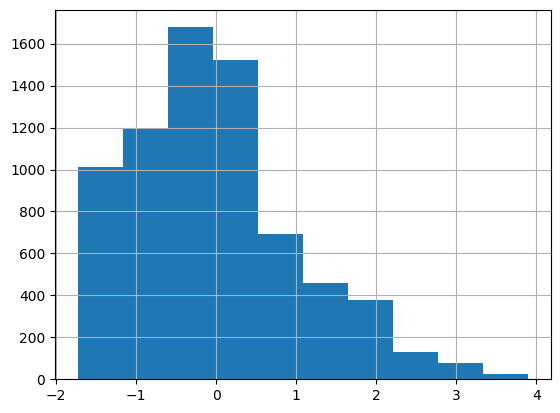

In [11]:
summaries.content.hist()

<Axes: >

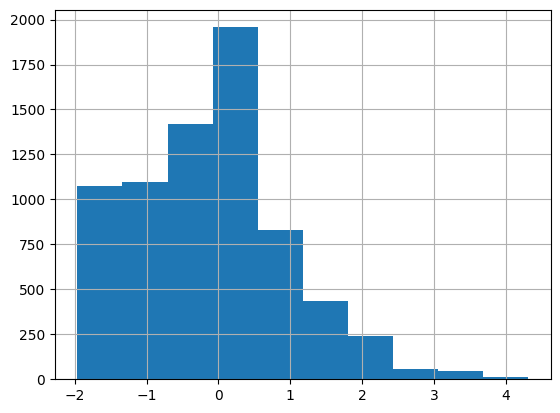

In [12]:
summaries.wording.hist()

# Data preparation

## lets merge the datasets

In [13]:
data=pd.DataFrame(pd.merge(summaries, prompts_train, on='prompt_id'))

In [14]:
print(data.shape)
data.head()

(7165, 8)


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


In [15]:
data.student_id.value_counts()

student_id
000e8c3c7ddb    1
d6e5ca7be11e    1
d80211468595    1
d7d69636baae    1
d7d5e14dc0b4    1
               ..
a2cb87fb5211    1
a2a94802f4d5    1
a278462e1459    1
a26b132341f3    1
ffe4a98093b2    1
Name: count, Length: 7165, dtype: int64

In [17]:



import spacy

# Data Cleaning and Preprocessing
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces (you can customize this)
    text = ' '.join(token for token in text.split())
    return text

# Load the spaCy English language model for tokenization and lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(text):
    # Tokenization and lemmatization using spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc ]
    return ' '.join(tokens)

# Apply data cleaning and preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(clean_text)
data['preprocessed_text'] = data['cleaned_text'].apply(preprocess_text)
data['prompt_question'] = data['prompt_question'].apply(clean_text)
data['prompt_question'] = data['prompt_question'].apply(preprocess_text)
data['prompt_title'] = data['prompt_title'].apply(clean_text)
data['prompt_title'] = data['prompt_title'].apply(preprocess_text)

In [34]:
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))
     
    return intersection / union

In [36]:
data['preprocessed_text'][1]

'the third wave develop rapidly because the student genuinly believe that it be the good course of action . their grade , acomplishment , and classparticipation/ behavior have improve dramatically since the experiment begin . there do not seem to be any consiquense in the student eye . they become extremely engaged in all the third wave activite both inside and outside tha classroom . the experiment end because the student be so patriotic about the " movement " . the history class of thirty rapidly grow to 200 in three day . that mean 170 student join a school " movement " in two day . that s 85 people per day ! on the fifth and final day all the student have completley believe that the " third wave " be a movement that would expell democracy . they believe a candidate from the " movement " would anounce its existance on television after five day of its success . the creater , ron jones , believe it have go too far and for everyone \'s safety he shut it down . if he have not the fake o

In [ ]:
jaccard=[]
for i in range(len(data)):
    set1=data.text.iloc[i]
    set2=data.text

In [18]:
data.columns

Index(['student_id', 'prompt_id', 'text', 'content', 'wording',
       'prompt_question', 'prompt_title', 'prompt_text', 'cleaned_text',
       'preprocessed_text'],
      dtype='object')

In [21]:
xtrain=data[['student_id', 'prompt_id', 'preprocessed_text', 'prompt_title', 'prompt_question']]
y_wording=data['wording']
y_content=data['content']


In [23]:
xtrain.head()

,student_id,prompt_id,preprocessed_text,prompt_title,prompt_question
0,000e8c3c7ddb,814d6b,the third wave be an experimentto see how peop...,the third wave,summarize how the third wave develop over such...
1,0070c9e7af47,814d6b,the third wave develop rapidly because the stu...,the third wave,summarize how the third wave develop over such...
2,0095993991fe,814d6b,the third wave only start as an experiment wit...,the third wave,summarize how the third wave develop over such...
3,00c20c6ddd23,814d6b,the experiman be orginally about how even when...,the third wave,summarize how the third wave develop over such...
4,00d40ad10dc9,814d6b,the third wave develop so quickly due to the s...,the third wave,summarize how the third wave develop over such...


## split the data into test and train

In [24]:
X_train_wording, X_test_wording, y_train_wording, y_test_wording = train_test_split(xtrain, y_wording, test_size=0.2, random_state=42)
X_train_content, X_test_content, y_train_content, y_test_content = train_test_split(xtrain, y_content, test_size=0.2, random_state=42)

In [25]:
categorical_columns = ['student_id', 'prompt_id']

# Define a ColumnTransformer to apply preprocessing to selected columns
text_vectorizer = CountVectorizer(stop_words=None)


# Define a ColumnTransformer to apply preprocessing to selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_vectorizer, 'preprocessed_text'),
        ('title', text_vectorizer, 'prompt_title'),
        ('question', text_vectorizer, 'prompt_question'),
    ],
    remainder='drop', verbose_feature_names_out=False
)


## model Fitting

In [26]:
# Fit the model on wording dataset
pipeline =preprocessor.fit_transform(X_train_wording)
model= RandomForestRegressor()
model.fit(pipeline, y_train_wording)

pipeline1 =preprocessor.fit_transform(X_train_content)
model1= RandomForestRegressor()
model1.fit(pipeline1, y_train_content)

RandomForestRegressor()

## model evaluation

In [27]:
test_processed=preprocessor.transform(X_test_content)
y_preds = model.predict(test_processed)
mse = mean_squared_error(y_test_content, y_preds)
mse


0.4298882730206056

In [28]:
test_processed_wording=preprocessor.transform(X_test_wording)
y_preds_wording = model.predict(test_processed_wording)
mse1 = mean_squared_error(y_test_wording, y_preds_wording)
mse1

0.4511568609225474

## make predictions for submisssions

In [29]:
summaries_test=pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv')
prompts_test=pd.read_csv('/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv')
test=pd.merge(summaries_test, prompts_test, on='prompt_id')

test['cleaned_text'] = test['text'].apply(clean_text)
test['preprocessed_text'] = test['cleaned_text'].apply(preprocess_text)
test['prompt_question'] = test['prompt_question'].apply(clean_text)
test['prompt_question'] = test['prompt_question'].apply(preprocess_text)
test['prompt_title'] = test['prompt_title'].apply(clean_text)
test['prompt_title'] = test['prompt_title'].apply(preprocess_text)

In [ ]:
test

In [30]:
xtest=preprocessor.transform(test)
y_pred = model.predict(xtest)
y_pred_content=model1.predict(xtest)

In [ ]:
y_pred_content

In [31]:
submission=pd.DataFrame({'student_id':test.student_id, 'content':y_pred_content, 'wording':y_pred})

In [32]:
submission.to_csv('submission.csv', index=False)

In [33]:
submission

,student_id,content,wording
0,000000ffffff,-1.402487,-1.38257
1,222222cccccc,-1.402487,-1.38257
2,111111eeeeee,-1.402487,-1.38257
3,333333dddddd,-1.402487,-1.38257
